Student name: Ashik Kannampilly Janardhanan

Student id: 25032615

**Impotant**: The code for this activity takes long to run so we won't be able to run it again if something is wrong with your submitted notebook. Make sure that your code ran successfully and all outputs are visible before submitting your notebook.

General rules:

1. Do not change anything in the given code unless you are requested to.

2. Install any external libraries that you might want to use within the notebook file with the !pip install command, so that your code can run without errors during autotests. This rule doesn't apply for numpy, pandas, matplotlib, and sklearn.

3. For any code you add, don't use again any of the predefined names for variables, functions, or classes that are already included in the template (i.e. no duplicate names).

# Task: Deep neural networks

#### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data and manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's also visualise a few random samples of this

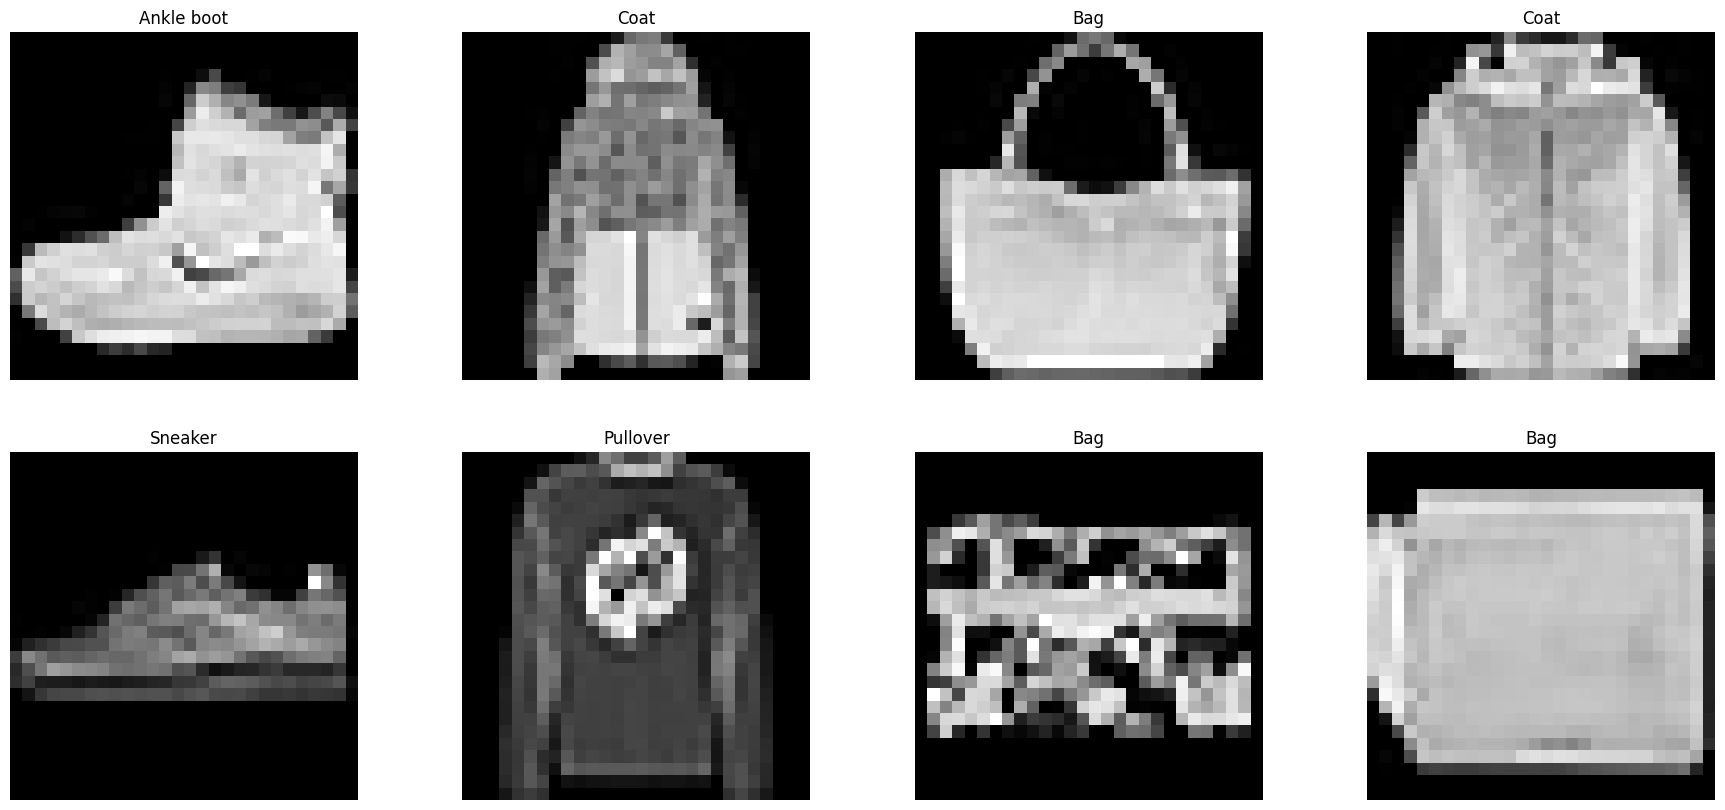

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

Insert your code below:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

############################
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Task 1: Train a Perceptron (Weight 30/100)

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy both on the train and test sets.
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

Insert your code below:

In [ ]:
from sklearn.linear_model import Perceptron as Perceptron

##################
# Your code here
prt = Perceptron(max_iter=100)
prt.fit(X_train_scaled, y_train)

train_pred = prt.predict(X_train_scaled)
test_pred = prt.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

##################
# Your code here
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Perceptron Training Accuracy:", train_acc)
print("Perceptron Testing Accuracy :", test_acc)

Perceptron Training Accuracy: 0.8257142857142857
Perceptron Testing Accuracy : 0.8115714285714286


Find an example where the classification is incorrect

misclassified sample index: 0
True label: 2
Predicted label: 4


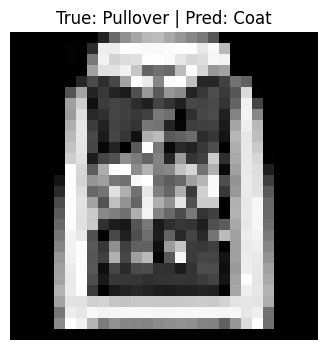

In [ ]:
w_index = None
for idx in range(len(test_pred)):
    if test_pred[idx] != y_test[idx]:
        w_index = idx
        break

print("misclassified sample index:", w_index)
print("True label:", y_test[w_index])
print("Predicted label:", test_pred[w_index])
plt.figure(figsize=(4,4))
plt.imshow(X_test[w_index].reshape(28,28), cmap="gray")
plt.title(f"True: {text_labels[int(y_test[w_index])]} | Pred: {text_labels[int(test_pred[w_index])]}")
plt.axis("off")
plt.show()

Enter your text here:

3. Discuss the result, does it seem good or bad?

Ans :The results are okay but not very strong. The model gets about 82% on training and 81% on testing, which means it’s doing a reasonable job, but it still makes plenty of mistakes. Fashion-MNIST is a harder dataset, so a simple perceptron can only go so far. It’s a decent starting point, but not very reliable for real-world use.

4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)

Ans: The perceptron misclassified this example as a coat even though the correct label is pullover. Looking at the image, the two classes do share a similar overall shape, so it’s understandable that a simple model might confuse them. The features are quite subtle, and the perceptron doesn’t capture enough detail to reliably tell them apart.

5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

Ans: A perceptron on its own can only make a yes/no decision, but we can turn it into a multi-class model by training one perceptron for each class. Each one basically tries to answer the question: “Does this image belong to me?”
When we want to classify something, all the perceptrons give a score, and we simply pick the class with the highest score.

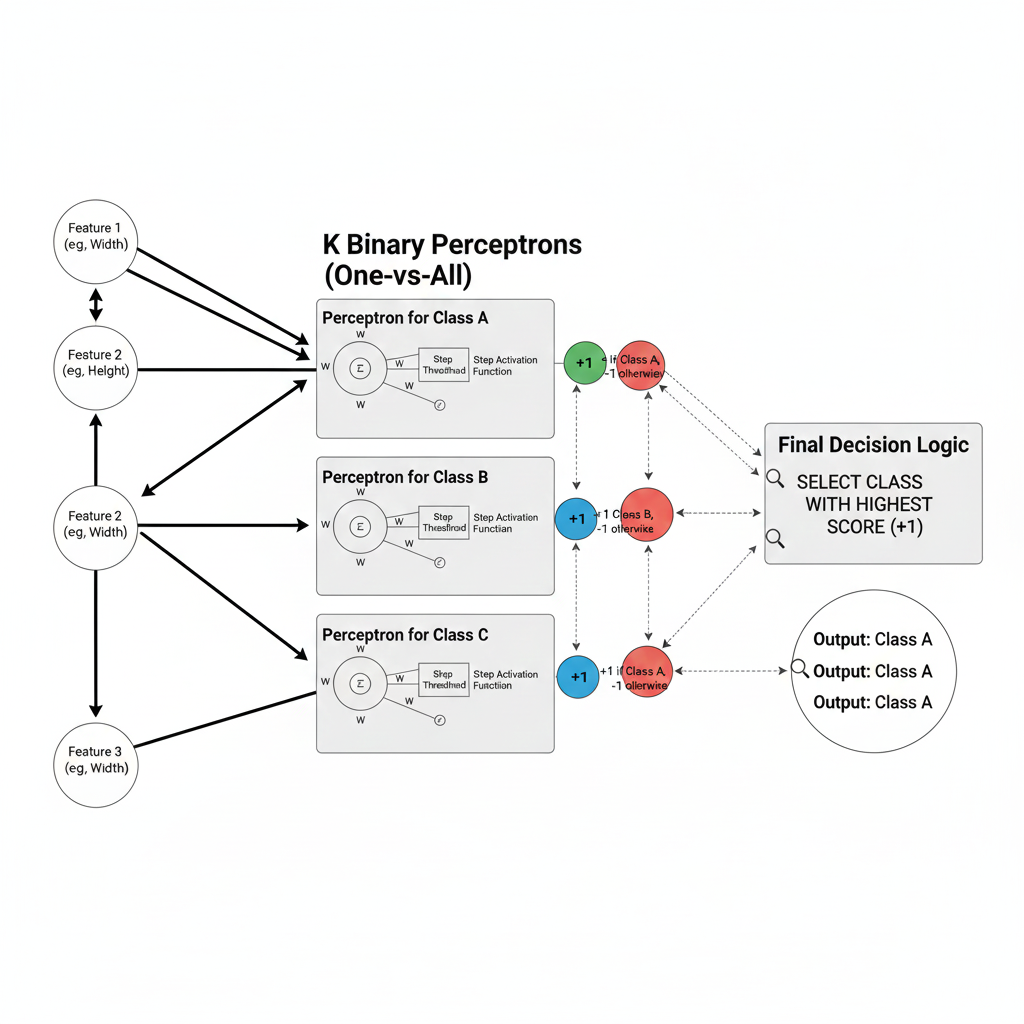

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20) (Weight 30/100)

Let's try going wide first

* Set the regularizing parameter to 0.001 (alpha = 0.001). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=42 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,).

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and test accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

Insert your code below:

In [ ]:
from sklearn.neural_network import MLPClassifier

#######################
# Your code here
mlp = MLPClassifier(hidden_layer_sizes=(20,),alpha=0.001,verbose=1,random_state=42,max_iter=100)
mlp.fit(X_train_scaled, y_train)

train_pred_mlp = mlp.predict(X_train_scaled)
test_pred_mlp = mlp.predict(X_test_scaled)


Iteration 1, loss = 0.63768093
Iteration 2, loss = 0.42186738
Iteration 3, loss = 0.38505507
Iteration 4, loss = 0.36320714
Iteration 5, loss = 0.34776936
Iteration 6, loss = 0.33752283
Iteration 7, loss = 0.32765729
Iteration 8, loss = 0.31820919
Iteration 9, loss = 0.31283792
Iteration 10, loss = 0.30666357
Iteration 11, loss = 0.30103009
Iteration 12, loss = 0.29581097
Iteration 13, loss = 0.29107102
Iteration 14, loss = 0.28758881
Iteration 15, loss = 0.28310182
Iteration 16, loss = 0.28046436
Iteration 17, loss = 0.27554454
Iteration 18, loss = 0.27133785
Iteration 19, loss = 0.26812727
Iteration 20, loss = 0.26686857
Iteration 21, loss = 0.26326890
Iteration 22, loss = 0.26050504
Iteration 23, loss = 0.25761600
Iteration 24, loss = 0.25533508
Iteration 25, loss = 0.25338964
Iteration 26, loss = 0.25018118
Iteration 27, loss = 0.24783313
Iteration 28, loss = 0.24762115
Iteration 29, loss = 0.24471216
Iteration 30, loss = 0.24275589
Iteration 31, loss = 0.24167374
Iteration 32, los

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score

#######################
# Your accuracy score code here
train_acc_mlp = accuracy_score(y_train, train_pred_mlp)
test_acc_mlp = accuracy_score(y_test, test_pred_mlp)
print("MLP Training Accuracy:", train_acc_mlp)
print("MLP Testing Accuracy :", test_acc_mlp)

MLP Training Accuracy: 0.9397321428571429
MLP Testing Accuracy : 0.8665


#### Questions: (answer here)

1. What is the size of the input layer here? Explain
2. What is the size of the output layer here? Explain
3. How many weights in total does the algorithm learn?
4. What does it mean that the training accuracy and the test accuracy are different?

Enter your text here:

1.
The input layer has 784 neurons, one for each pixel in the 28×28 grayscale image. Each image is flattened into a single vector, so every pixel becomes one input neuron.

2.
The output layer has 10 neurons, one for each clothing category (T-shirt/top, Trouser, Pullover, etc.). Each neuron represents the network’s confidence that the image belongs to that class.

3.
Total number of weights:
The network learns weights for connections from the input to the hidden layer and from the hidden layer to the output layer:

Input → Hidden: 784 × 20 = 15,680 weights

Hidden → Output: 20 × 10 = 200 weights

Plus biases: 20 for hidden neurons and 10 for output neurons

Total = 15,910 weights

4.
Difference between training and test accuracy:
The training accuracy is about 93.97%, while the test accuracy is about 86.65%. This difference shows that the model learned the training data very well but does not perform as strongly on unseen images. The gap between the two accuracies indicates some overfitting: the model is capturing details from the training set that do not fully generalize to new data. This level of difference is normal for neural networks, but it still shows that the model is not perfectly generalizing.

#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. Iterate over a set of widths of `(20, 50, 100, 200)`.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

Enter your code here:

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

train_accuracies = []
test_accuracies = []

widths = (20, 50, 100, 200)

########################
# Your classifier training code here
for w in widths:
    mlp_temp = MLPClassifier(hidden_layer_sizes=(w,),alpha=0.001,random_state=42,max_iter = 100)
    mlp_temp.fit(X_train_scaled, y_train)
    train_acc = accuracy_score(y_train, mlp_temp.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, mlp_temp.predict(X_test_scaled))
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


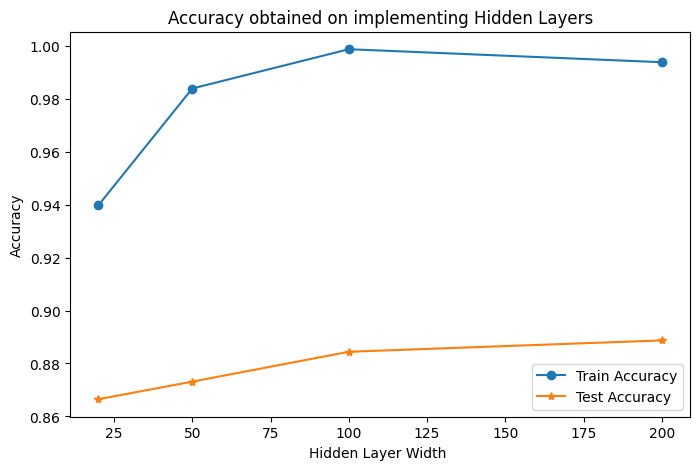

In [ ]:
import matplotlib.pyplot as plt

########################
# Your plot of training and test accuracy here
plt.figure(figsize=(8,5))
plt.plot(widths, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(widths, test_accuracies, marker='*', label='Test Accuracy')
plt.title("Accuracy obtained on implementing Hidden Layers")
plt.xlabel("Hidden Layer Width ")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

2. What can you infer from the graph?

For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

Enter your text here:

1.
As the hidden layer width increased, the training time also increased noticeably. Wider layers mean more neurons and therefore more weights to learn, which makes the network take longer to update during each epoch. For example, training with 200 neurons took much longer than training with 20 neurons. This shows that adding more neurons can improve capacity but also increases computation time.

2.
Best Performance / Optimal Neuron Count:
The model with 50 neurons gives the best balance. The test accuracy (~87%) is almost as high as the maximum achieved, but the model is simpler and more efficient, with fewer weights to train.

Learned Weights (Approximate):
For this 50-neuron hidden layer, the network learns roughly 50 × 784 + 50 × 10 + biases(10) = 39,760 weights.

Evidence of Overfitting:
Yes, there is clear overfitting. As the hidden layer size increases beyond 50 neurons, the training accuracy rises close to 100%, but the test accuracy improves very little. This shows the network is memorizing the training data rather than generalizing well.

Ways to Reduce Overfitting:
Techniques like Early Stopping (stop training when the test accuracy stops improving) or L2 Regularization (penalizing large weights) could help prevent the model from becoming too complex.

## Task 3: The deeper the better! (Weight 30/100)

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. Use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to be able to design networks efficiently and pick the right training parameters.

Enter your code here:

In [ ]:
layers = ((20,20),(20,20,20),(50,20),(100,100,50))  # DO NOT CHANGE THE VALUES

train_accuracies_deep = []  # DO NOT CHANGE THE NAME
test_accuracies_deep = []  # DO NOT CHANGE THE NAME

########################
# Your classifier training code here
for config in layers:
    mlp_deep = MLPClassifier(hidden_layer_sizes=config,alpha=0.001,random_state=42,max_iter=100)
    mlp_deep.fit(X_train_scaled, y_train)
    train_acc = accuracy_score(y_train, mlp_deep.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, mlp_deep.predict(X_test_scaled))
    train_accuracies_deep.append(train_acc)
    test_accuracies_deep.append(test_acc)

for i, config in enumerate(layers):
    print(f"Layers {config} -> Train Accuracy: {train_accuracies_deep[i]:.4f}, Test Accuracy: {test_accuracies_deep[i]:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers (20, 20) -> Train Accuracy: 0.9482, Test Accuracy: 0.8657
Layers (20, 20, 20) -> Train Accuracy: 0.9509, Test Accuracy: 0.8662
Layers (50, 20) -> Train Accuracy: 0.9880, Test Accuracy: 0.8720
Layers (100, 100, 50) -> Train Accuracy: 0.9942, Test Accuracy: 0.8889


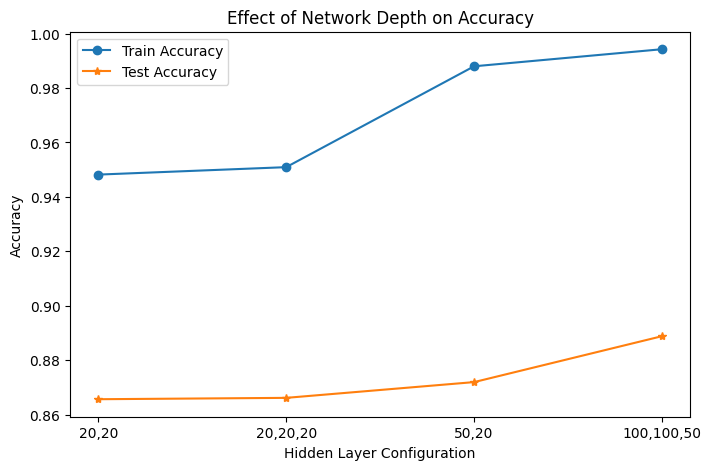

In [ ]:
import matplotlib.pyplot as plt

########################
# Your visualisation code here
plt.figure(figsize=(8,5))
layer_labels = ['20,20', '20,20,20', '50,20', '100,100,50']
plt.plot(layer_labels, train_accuracies_deep, marker='o', label='Train Accuracy')
plt.plot(layer_labels, test_accuracies_deep, marker='*', label='Test Accuracy')
plt.title("Effect of Network Depth on Accuracy")
plt.xlabel("Hidden Layer Configuration")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#### Questions

What can you infer from the graph? (answer in the text box here).

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?

Enter your text here:

From the graph, we can see that deeper networks with fewer neurons—such as the configuration (20,20,20)—perform nearly as well as the much wider network (100,100,50). Although the widest model achieves the highest training accuracy, the improvement in test accuracy is relatively small. This suggests that adding large numbers of neurons mainly helps the network fit the training data more closely rather than improving generalization.

A more moderate architecture like (50,20) provides strong performance on both training and test sets while using far fewer weights, making it a more efficient choice. The wider networks require a substantial increase in the number of parameters, yet the gain in test accuracy is minor. This indicates diminishing returns and hints at some overfitting, as the training accuracy climbs much faster than the test accuracy.

## Task 4: Confusion matrix (Weight 10/100)

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.

Enter your code here:

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


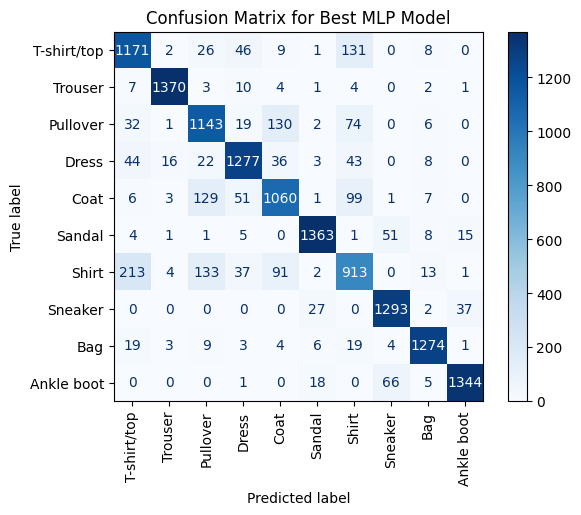

In [ ]:
########################
# Your code here
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


mlp_best = MLPClassifier(hidden_layer_sizes=(50,20), alpha=0.001, random_state=42,max_iter=100)
mlp_best.fit(X_train_scaled, y_train)
y_pred = mlp_best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix for Best MLP Model")
plt.show()


Enter your text here:

The confusion matrix shows that the MLP model performs very well overall, with most predictions lying on the diagonal—meaning the correct class was chosen. Misclassifications mostly occur between visually similar categories. For example, T-shirts are often confused with Shirts, and Coats are sometimes mistaken for Pullovers or Dresses. Classes that are visually distinct, such as Trousers, Bags, Sneakers, and Ankle Boots, show very high accuracy with very few errors. Overall, the matrix indicates strong performance with some expected confusion between similar clothing items.